In [58]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.api.datasets import cifar10
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.api.utils import to_categorical
from keras.api.models import Sequential
from keras.api.layers import Dense, Conv2D, MaxPooling2D
from keras.api.layers import Dropout, Flatten, BatchNormalization
from keras.api.regularizers import l2
from keras.api.optimizers import Adam
from keras.api.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [2]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.18.0
Num GPUs Available:  1


In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [8]:
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (45000, 32, 32, 3)
Train Labels Shape:       (45000, 1)

Validation Images Shape:  (5000, 32, 32, 3)
Validation Labels Shape:  (5000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


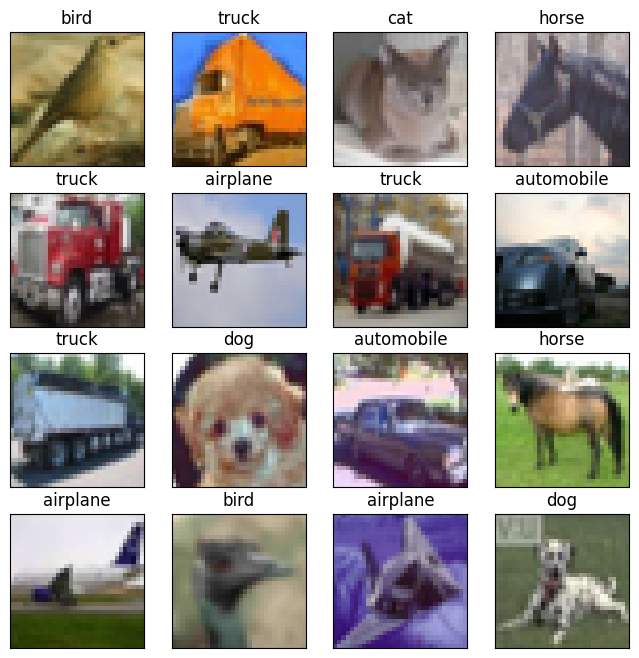

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [10]:
# convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)

In [11]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

In [12]:
# data augmentation
data_generator = ImageDataGenerator(
    # rotate images randomly by up to 15 degrees
    rotation_range=15,

    # shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    
    # shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    
    # sandomly flip images horizontally
    horizontal_flip=True,
    
    # zoom images in by up to 10%
    zoom_range=0.1,
    
    # change brightness by up to 10%
    brightness_range=[0.9,1.1],

    # shear intensity
    shear_range=10,
    
    # channel shift intensity
    channel_shift_range=0.1,
)

In [13]:
model = Sequential()

# Set the weight decay value for L2 regularization
weight_decay = 0.0001

# first convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), 
                 input_shape=X_train.shape[1:]))
model.add(BatchNormalization())

# second convolutional layer similar to the first
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

# third and fourth convolutional layers with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))   
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# fifth and sixth convolutional layers with 128 filters
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))

# feventh and eighth convolutional layers with 256 filters
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))

# flatten the tensor output from the previous layer
model.add(Flatten())

# softmax activation function for outputting class probabilities
model.add(Dense(10, activation='softmax'))

/home/denys/Desktop/projects/deep-learning/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1735507882.530499  106167 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,186,346 (4.53 MB)

 Trainable params: 1,184,426 (4.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
batch_size = 64

epochs = 300

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# reduce the learning rate by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# stop the training if no improvement in validation loss is observed for 40 epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# save the model with the best validation loss
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# train the model
history = model.fit(
    data_generator.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[reduce_lr, early_stopping, checkpoint], 
    verbose=2
)

Epoch 1/300


/home/denys/Desktop/projects/deep-learning/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1735507886.329348  106386 service.cc:148] XLA service 0x7b2e2000d1b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735507886.329373  106386 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-12-29 23:31:26.431489: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735507886.834338  106386 cuda_dnn.cc:529] Loaded cuDNN version 90600
I0000 00:0


Epoch 1: val_loss improved from inf to 1.66742, saving model to best_model.keras
704/704 - 42s - 60ms/step - accuracy: 0.3347 - loss: 2.3532 - val_accuracy: 0.4440 - val_loss: 1.6674 - learning_rate: 5.0000e-04
Epoch 2/300

Epoch 2: val_loss improved from 1.66742 to 1.54845, saving model to best_model.keras
704/704 - 24s - 33ms/step - accuracy: 0.4605 - loss: 1.7612 - val_accuracy: 0.5214 - val_loss: 1.5485 - learning_rate: 5.0000e-04
Epoch 3/300

Epoch 3: val_loss improved from 1.54845 to 1.20786, saving model to best_model.keras
704/704 - 24s - 33ms/step - accuracy: 0.5276 - loss: 1.5225 - val_accuracy: 0.6104 - val_loss: 1.2079 - learning_rate: 5.0000e-04
Epoch 4/300

Epoch 4: val_loss improved from 1.20786 to 1.14086, saving model to best_model.keras
704/704 - 24s - 33ms/step - accuracy: 0.5741 - loss: 1.3698 - val_accuracy: 0.6366 - val_loss: 1.1409 - learning_rate: 5.0000e-04
Epoch 5/300

Epoch 5: val_loss did not improve from 1.14086
704/704 - 23s - 33ms/step - accuracy: 0.6112

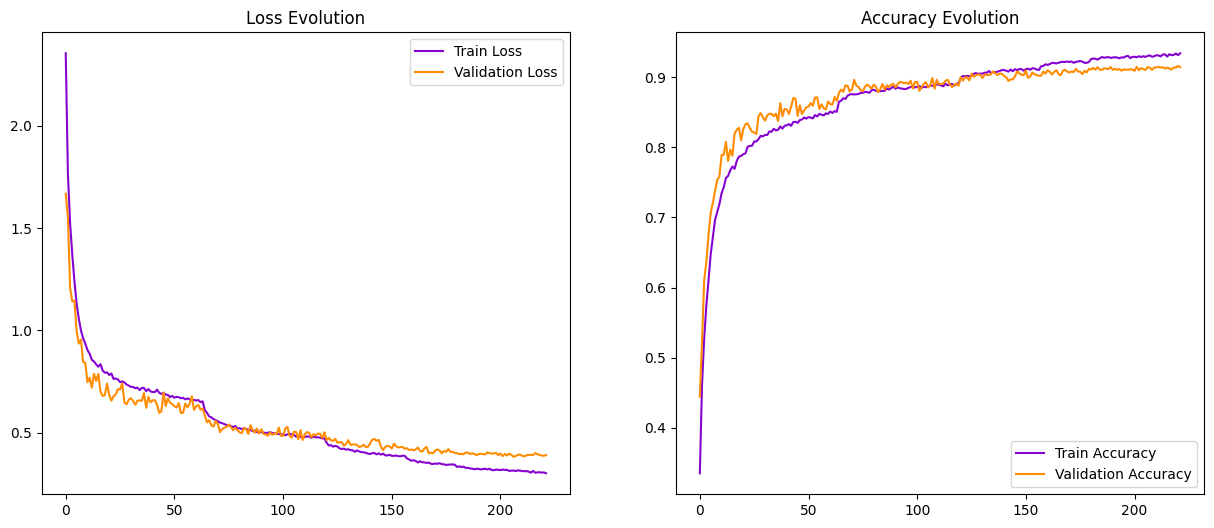

In [ ]:
plt.figure(figsize=(15,6))

# training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [30]:
# evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9088 - loss: 0.4219

Test Accuracy: 0.9096999764442444
Test Loss:     0.4196023941040039


In [36]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
y_test_classes = np.argmax(y_test, axis=1)

predictions = model.predict(X_test)
predicted_classes= np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [46]:
print(classification_report(y_test_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1000
           1       0.96      0.97      0.96      1000
           2       0.89      0.88      0.89      1000
           3       0.88      0.76      0.81      1000
           4       0.90      0.92      0.91      1000
           5       0.90      0.81      0.85      1000
           6       0.83      0.98      0.89      1000
           7       0.94      0.95      0.95      1000
           8       0.95      0.95      0.95      1000
           9       0.92      0.97      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<Figure size 1000x1000 with 0 Axes>

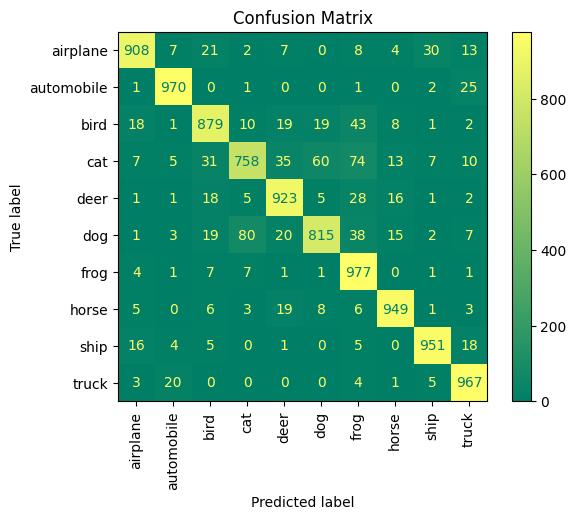

In [48]:
confusion_mat = confusion_matrix(y_test_classes, predicted_classes)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=class_names)

plt.figure(figsize=(10, 10))  
cm_display.plot(xticks_rotation='vertical', cmap='summer')
plt.title("Confusion Matrix")  
plt.show()  
